In [1]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import os
import shutil
import re
import seaborn as sns
from pathlib import Path

C:\Users\Rudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
os.listdir(os.path.join(os.getcwd(),"testdir"))

['models', 'test', 'train', 'valid']

In [3]:
def split_indices(folder, seed1, seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1, n+1))

    random.seed(seed1)
    train = random.sample(list(range(1, n+1)), int(.5*n))

    remain = list(set(full_set) - set(train))

    random.seed(seed2)
    valid = random.sample(remain, int(.5*len(remain)))
    test = list(set(remain) - set(valid))
    
    return(train, valid, test)

def get_names(waste_type, indices):
    file_names = [waste_type + str(i) + ".jpg" for i in indices]
    return(file_names)    

def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [4]:
subsets = ['train','valid']
# waste_types = ['cardboard','glass','metal','paper','plastic','trash']
classes = ['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 'seaPlants', 
           'cardboard','glass','metal','paper','plastic','trash']
## creating destination folders for data subset and waste type
for subset in subsets:
    for waste_class in classes:
        folder = os.path.join('data', subset, waste_class)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_class in classes:
    source_folder = os.path.join('data', waste_class)
    train_ind, valid_ind, test_ind = split_indices(source_folder, 1, 1)
    
    ## move source files to train
    train_names = get_names(waste_class, train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/" + waste_class
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_class, valid_ind)
    valid_source_files = [os.path.join(source_folder, name) for name in valid_names]
    valid_dest = "data/valid/" + waste_class
    move_files(valid_source_files, valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_class, test_ind)
    test_source_files = [os.path.join(source_folder, name) for name in test_names]
    move_files(test_source_files, "data/test")

In [5]:
## confirming path for the images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data')

In [6]:
coastalDebris = ImageDataBunch.from_folder(path, test="test", bs=16, size=224, no_check=True)

In [7]:
coastalDebris

ImageDataBunch;

Train: LabelList (1502 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Valid: LabelList (749 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Test: LabelList (755 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data

In [8]:
print(coastalDebris.classes)

['babyTurtles', 'cardboard', 'debris', 'emptyBeaches', 'glass', 'metal', 'paper', 'plastic', 'plasticsBeach', 'seaPlants', 'trash']


In [9]:
print(coastalDebris.train_ds)

LabelList (1502 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data


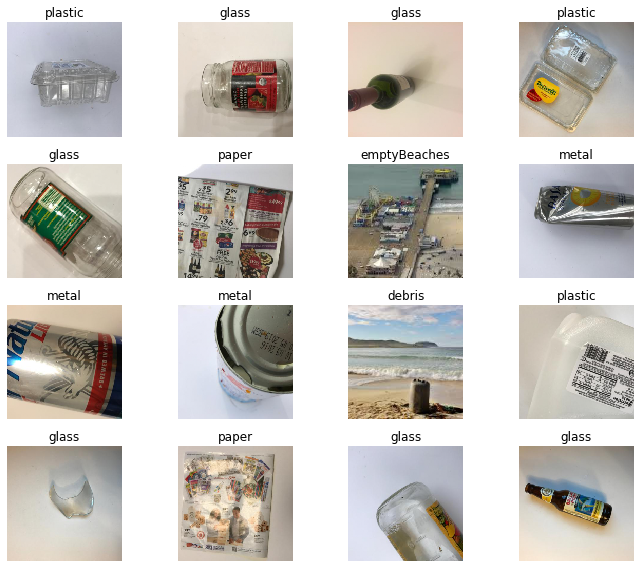

In [10]:
#showing pictures as a test
coastalDebris.show_batch(rows=10, figsize=(10,8))

In [11]:
learn = cnn_learner(coastalDebris,models.resnet34,metrics=error_rate)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,error_rate,time


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\Users\Rudy\Anaconda3\lib\multiprocessing\queues.py", line 232, in _feed
    close()
  File "C:\Users\Rudy\Anaconda3\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\Users\Rudy\Anaconda3\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Rudy\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\Rudy\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Rudy\Anaconda3\lib\multiprocessing\queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.13E-06
Min loss divided by 10: 1.86E-03


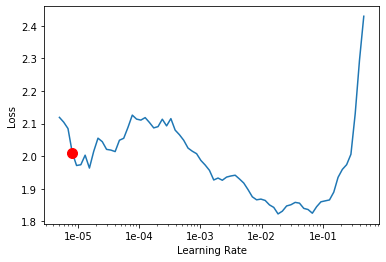

In [23]:
#showing learning rate

learn.lr_find(start_lr=1e-6, end_lr=1e1)
learn.recorder.plot(suggestion=True)
# learn.recorder.plot()

In [24]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

8.128305161640993e-06

In [25]:
#running epochs
learn.fit_one_cycle(20, max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.849451,1.368163,0.488652,00:52
1,1.627467,1.184032,0.413885,00:51
2,1.462573,1.118936,0.409880,00:51
3,1.331247,1.106525,0.400534,00:52
4,1.289845,1.010567,0.361816,00:52
5,1.186325,1.010929,0.360481,00:51
6,1.124858,0.951563,0.337784,00:51
7,1.045293,1.720425,0.332443,00:52
8,1.000387,1.044624,0.371162,00:51
9,0.922367,0.948055,0.335113,00:50


In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [27]:
#using torch + tensor to get the highest error pictures
torch.Tensor.ndim = property(lambda x: len(x.size()))

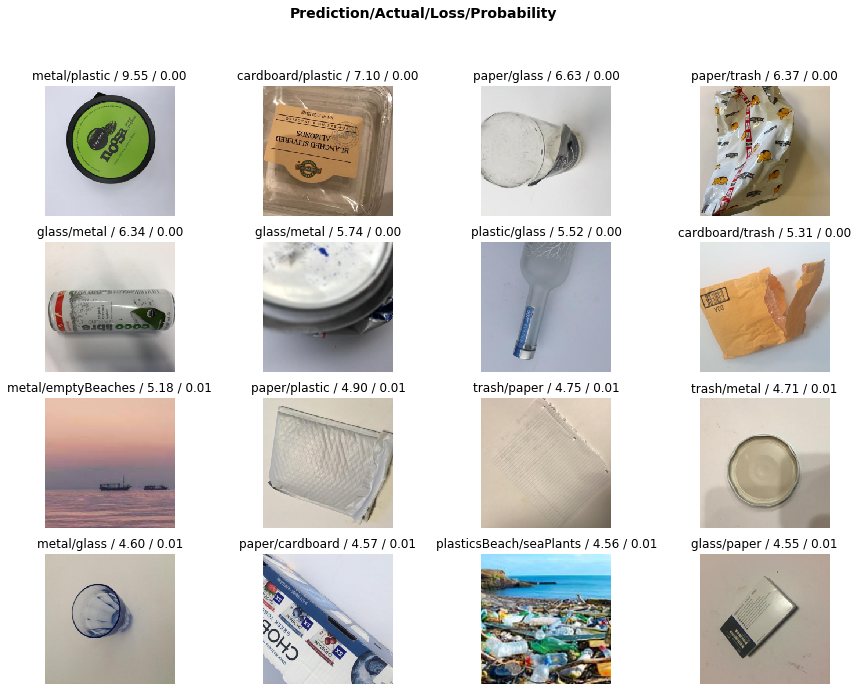

In [28]:
#shows the top 16 images that were identified incorrectly along with their statistics
interp.plot_top_losses(16, figsize=(15,11))

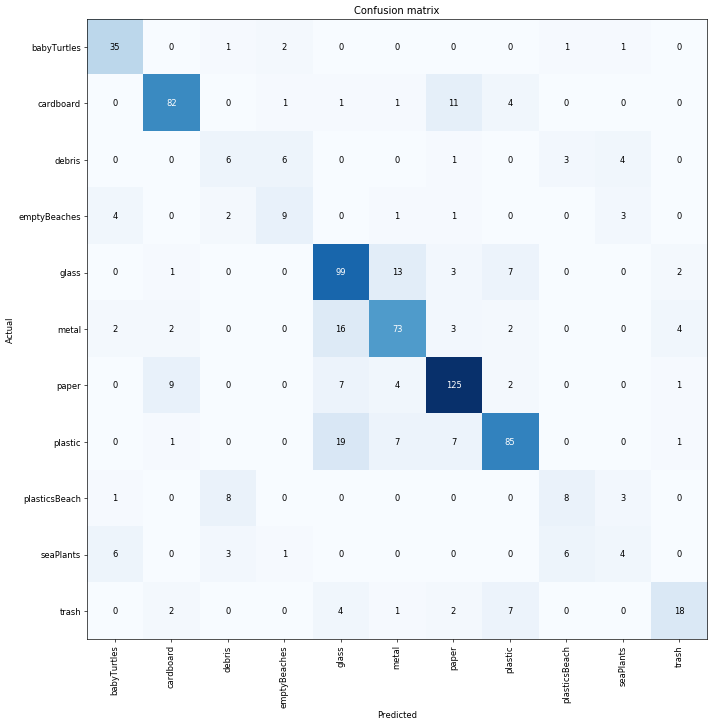

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

In [29]:
#confusion matrix shows that glass was confused for metal the most
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [30]:
interp.most_confused(min_val=2)

[('plastic', 'glass', 19),
 ('metal', 'glass', 16),
 ('glass', 'metal', 13),
 ('cardboard', 'paper', 11),
 ('paper', 'cardboard', 9),
 ('plasticsBeach', 'debris', 8),
 ('glass', 'plastic', 7),
 ('paper', 'glass', 7),
 ('plastic', 'metal', 7),
 ('plastic', 'paper', 7),
 ('trash', 'plastic', 7),
 ('debris', 'emptyBeaches', 6),
 ('seaPlants', 'babyTurtles', 6),
 ('seaPlants', 'plasticsBeach', 6),
 ('cardboard', 'plastic', 4),
 ('debris', 'seaPlants', 4),
 ('emptyBeaches', 'babyTurtles', 4),
 ('metal', 'trash', 4),
 ('paper', 'metal', 4),
 ('trash', 'glass', 4),
 ('debris', 'plasticsBeach', 3),
 ('emptyBeaches', 'seaPlants', 3),
 ('glass', 'paper', 3),
 ('metal', 'paper', 3),
 ('plasticsBeach', 'seaPlants', 3),
 ('seaPlants', 'debris', 3),
 ('babyTurtles', 'emptyBeaches', 2),
 ('emptyBeaches', 'debris', 2),
 ('glass', 'trash', 2),
 ('metal', 'babyTurtles', 2),
 ('metal', 'cardboard', 2),
 ('metal', 'plastic', 2),
 ('paper', 'plastic', 2),
 ('trash', 'cardboard', 2),
 ('trash', 'paper', 2)]

In [31]:
#trying to get a higher accuracy rate!
#learner.predict() only predicts on a single image, while learner.get_preds() 
#predicts on a set of images.
preds = learn.get_preds(ds_type=DatasetType.Test)

In [32]:
print(preds[0].shape)
preds[0]

torch.Size([755, 11])


tensor([[9.1051e-01, 4.0969e-05, 5.7913e-03,  ..., 1.5638e-02, 1.4318e-02,
         9.6829e-05],
        [9.4151e-01, 4.4556e-04, 8.0632e-03,  ..., 9.7541e-03, 1.4248e-02,
         3.3055e-03],
        [3.6992e-01, 5.3856e-04, 6.8361e-02,  ..., 4.7921e-03, 4.2096e-01,
         1.1839e-04],
        ...,
        [4.7708e-05, 6.4315e-04, 1.2197e-05,  ..., 1.0427e-05, 2.3212e-06,
         9.4497e-01],
        [5.3779e-05, 4.2613e-04, 4.8272e-06,  ..., 2.9269e-06, 1.9502e-06,
         9.0144e-01],
        [6.0132e-01, 1.5235e-01, 2.3704e-03,  ..., 8.3699e-04, 4.7311e-03,
         1.0781e-01]])

In [33]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [35]:
yhat = []
for max_idx in max_idxs:
    yhat.append(coastalDebris.classes[max_idx])

In [36]:
yhat

['babyTurtles',
 'babyTurtles',
 'seaPlants',
 'babyTurtles',
 'seaPlants',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'babyTurtles',
 'glass',
 'babyTurtles',
 'babyTurtles',
 'glass',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'seaPlants',
 'babyTurtles',
 'seaPlants',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'metal',
 'babyTurtles',
 'babyTurtles',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'plastic',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'metal',
 'paper',
 'cardboard',
 'paper',
 'cardboard',
 'paper',
 'cardboard',
 'paper',
 'paper',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 '

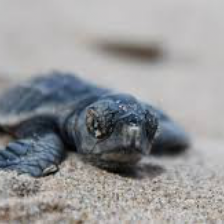

In [37]:
learn.data.test_ds[0][0]

In [38]:
y = []

for label_path in coastalDebris.test_ds.items:
    y.append(str(label_path))
    
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [39]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

#only one was wrong in this set

['babyTurtles', 'babyTurtles', 'seaPlants', 'babyTurtles', 'seaPlants']
['urtles', 'urtles', 'urtles', 'urtles', 'urtles']


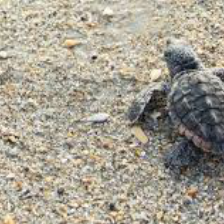

In [40]:
learn.data.test_ds[4][0]
#this is the picture that was predicted wrong by the machine (metal vs cardboard)

In [41]:
cm = confusion_matrix(y,yhat)
print(cm)

[[ 0  0  0  0 ...  0  0  0  0]
 [ 0 88  0  0 ...  0  0  0  0]
 [ 2  0  7  0 ...  3  3  0  0]
 [ 2  0  7  0 ...  9  2  0  0]
 ...
 [ 0  0  0  0 ...  0  0  0  0]
 [ 0  0  0  0 ...  0  0  0  0]
 [ 1  0  0  0 ...  0  0 20  0]
 [29  0  0  0 ...  0  4  0  0]]


In [48]:
df_cm = pd.DataFrame(cm, classes, classes) # changed waste_types to classes

plt.figure(figsize=(18,10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="BuPu")
plt.autoscale()
#used seaborn heatmaps library to make it pretty
#need to fix this because it's cut off but it shows most of the data
#edit: fixed with plt.autoscale!

ValueError: Shape of passed values is (15, 15), indices imply (11, 15)

In [32]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
#accuracy equation! assigning correct to how much the machine got right

In [33]:
#putting correct into the accuracy equation divided by the total amount
accuracy = correct/sum(sum(cm))
accuracy

0.9212598425196851

In [ ]:
#HUGE credits to https://medium.com/ml-and-automation/deep-learning-a-step-by-step-guide-using-fastai-9a5c55f9e4ce
#referenced this page so much
#dataset was sourced from kaggle 
#https://www.kaggle.com/asdasdasasdas/garbage-classification